# Telecom Churn Group Case Study

##### Team Members:
- Denis Roystan Dalmeida
- Divyalatha Bommu

**Problem Statement:**
    
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#### Import and Read Data

In [3]:
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

In [4]:
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Inspect the Dataframe

In [5]:
telecom_churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom_churn_data.shape

(99999, 226)

In [7]:
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### Data Cleaning

In [8]:
# Make a copy of original dataframe and clean the data
telecom_churn_data_ = telecom_churn_data

In [9]:
# Checking column-wise null percentages
round(telecom_churn_data_.isnull().sum() * 100 / len(telecom_churn_data_), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

#### Derive new features

In [10]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  telecom_churn_data_.columns[telecom_churn_data_.columns.str.contains('rech_amt|rech_data')]
amt_recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [11]:
# Checking missing values percentages
telecom_churn_data_check = 100*telecom_churn_data_.loc[:,amt_recharge_columns].isnull().sum()/len(telecom_churn_data_)
telecom_churn_data_check

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

We can see more then **74%** values for **recharge** related data are missing.

In [12]:
telecom_churn_data_.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


> We can create new feature as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data.

> Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [13]:
telecom_churn_data_['total_rech_data_6'] = telecom_churn_data_['total_rech_data_6'].replace(np.NaN,0.0)
telecom_churn_data_['total_rech_data_7'] = telecom_churn_data_['total_rech_data_7'].replace(np.NaN,0.0)
telecom_churn_data_['total_rech_data_8'] = telecom_churn_data_['total_rech_data_8'].replace(np.NaN,0.0)

In [14]:
telecom_churn_data_['av_rech_amt_data_6'] = telecom_churn_data_['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_churn_data_['av_rech_amt_data_7'] = telecom_churn_data_['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_churn_data_['av_rech_amt_data_8'] = telecom_churn_data_['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [15]:
# Adding new column total_rech_amt_data for calculating High Value Customer process
telecom_churn_data_['total_rech_amt_data_6'] = telecom_churn_data_.av_rech_amt_data_6 * telecom_churn_data_.total_rech_data_6
telecom_churn_data_['total_rech_amt_data_7'] = telecom_churn_data_.av_rech_amt_data_7 * telecom_churn_data_.total_rech_data_7
telecom_churn_data_['total_rech_amt_data_8'] = telecom_churn_data_.av_rech_amt_data_8 * telecom_churn_data_.total_rech_data_8

Defining total average recharge amount for good phase for months 6 and 7 (the good phase)

In [16]:
telecom_churn_data_['total_avg_rech_amt_6_7'] = (telecom_churn_data_.total_rech_amt_6 + telecom_churn_data_.total_rech_amt_data_6 \
+ telecom_churn_data_.total_rech_amt_7+ telecom_churn_data_.total_rech_amt_data_7)/2

#### Filter high-value customers

In [17]:
# Filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_churn_data_.total_avg_rech_amt_6_7.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

telecom_churn_data_high_val_cust = telecom_churn_data_[telecom_churn_data_.total_avg_rech_amt_6_7 > high_value_filter]
print('Rows after Filtering High Value Customers: ' + str(telecom_churn_data_high_val_cust.shape[0]))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Rows after Filtering High Value Customers: 29953


#### Tag churners and remove attributes of the churn phase

In [18]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [19]:
# Checking the NA/Null values are present or Not
null_check = 100*telecom_churn_data_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(telecom_churn_data_high_val_cust)
null_check

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [20]:
# Initially set all the values as 0
telecom_churn_data_high_val_cust['churn']= 0

In [21]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecom_churn_data_high_val_cust.total_ic_mou_9 == 0) & \
             (telecom_churn_data_high_val_cust.total_og_mou_9 == 0) & \
             (telecom_churn_data_high_val_cust.vol_2g_mb_9 ==0) & \
             (telecom_churn_data_high_val_cust.vol_3g_mb_9 ==0)

In [22]:
# set all which having is_churned True condition as 1
telecom_churn_data_high_val_cust.loc[is_churned,'churn']=1

In [23]:
# let us check what's the % of churned customers
100*telecom_churn_data_high_val_cust.churn.sum()/len(telecom_churn_data_high_val_cust)

8.122725603445398

After tagging churners, **remove all the attributes corresponding to the churn phase** (all attributes having ‘ _9’, etc. in their names).

In [24]:
churn_month_columns =  telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('_9')]

In [25]:
# drop all columns corresponding to the churn phase
telecom_churn_data_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

##### 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [26]:
unique_value_count_df = pd.DataFrame(telecom_churn_data_high_val_cust.nunique(), columns = ['unique_values'])

In [27]:
unique_value_count_df.loc[unique_value_count_df['unique_values'] == 1]

,unique_values
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1


> Dropping above features with only **one unique** value as they will not add any value to our model building and analysis

In [28]:
drop_unique_values_cols =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [29]:
print("Features before dropping unique values : "+ str(telecom_churn_data_high_val_cust.shape[1]))
telecom_churn_data_high_val_cust.drop(drop_unique_values_cols, axis=1, inplace=True)
print("Features after dropping unique values : "+ str(telecom_churn_data_high_val_cust.shape[1]))

Features before dropping unique values : 177
Features after dropping unique values : 164


Removing Date fields

In [30]:
date_columns =  telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('date')]

In [31]:
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [32]:
telecom_churn_data_high_val_cust.drop(telecom_churn_data_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)

##### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

In [33]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_churn_data_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [34]:
# Recharge amount related variables
recharge_amt_columns =  telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('rech_amt')]
recharge_amt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'total_avg_rech_amt_6_7']

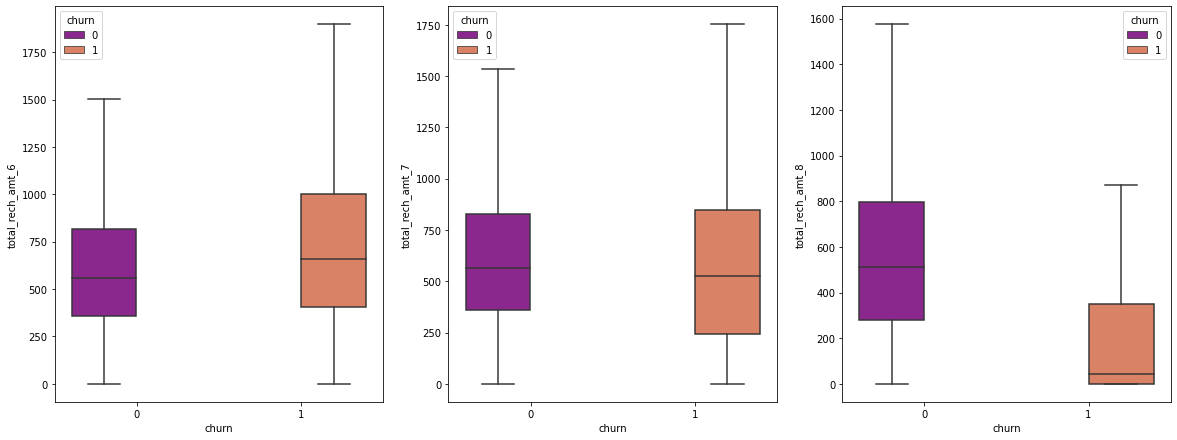

In [35]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

> We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

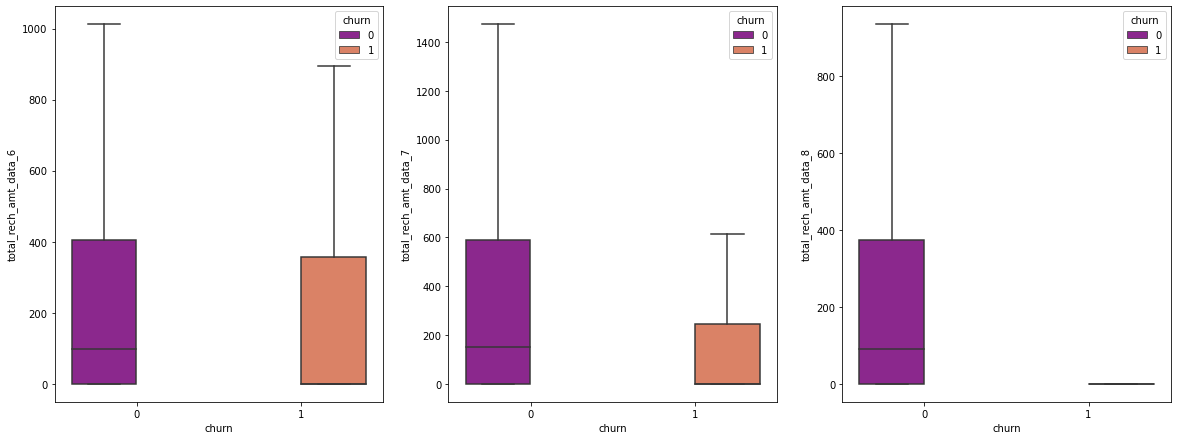

In [36]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

>  We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

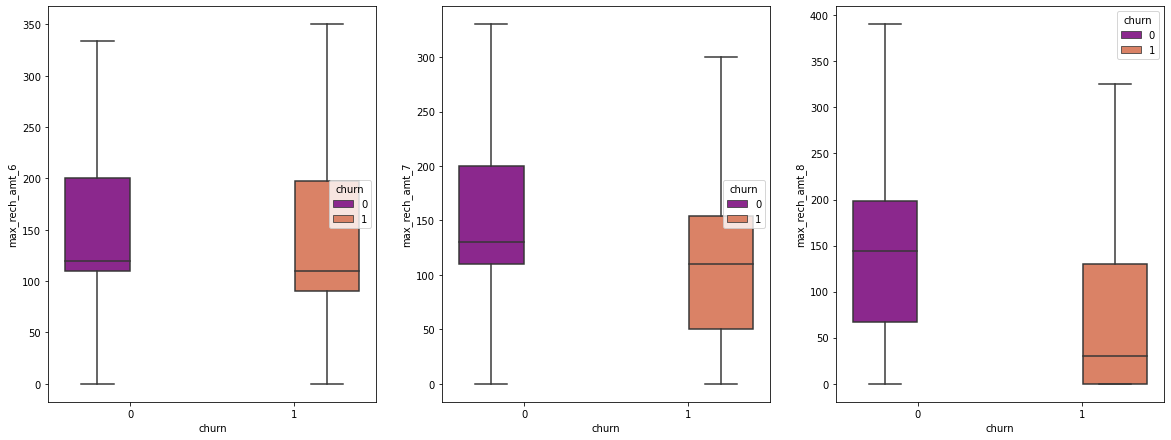

In [37]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

> We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [38]:
# Let's check other recharge related variables:
other_recharge = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [39]:
# lets check the % of NA values for other recharge related variables
100*telecom_churn_data_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecom_churn_data_high_val_cust)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [40]:
telecom_churn_data_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


> We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [41]:
telecom_churn_data_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_churn_data_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

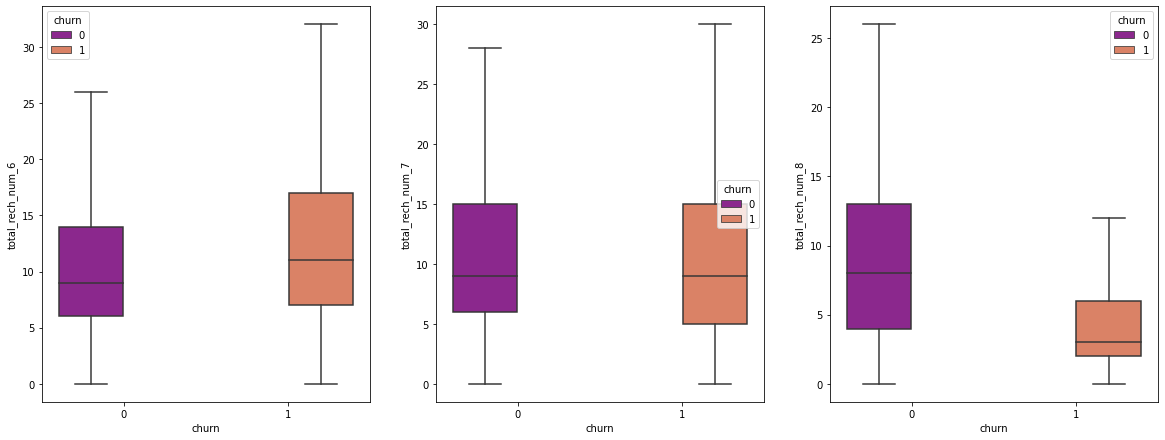

In [42]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

> We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

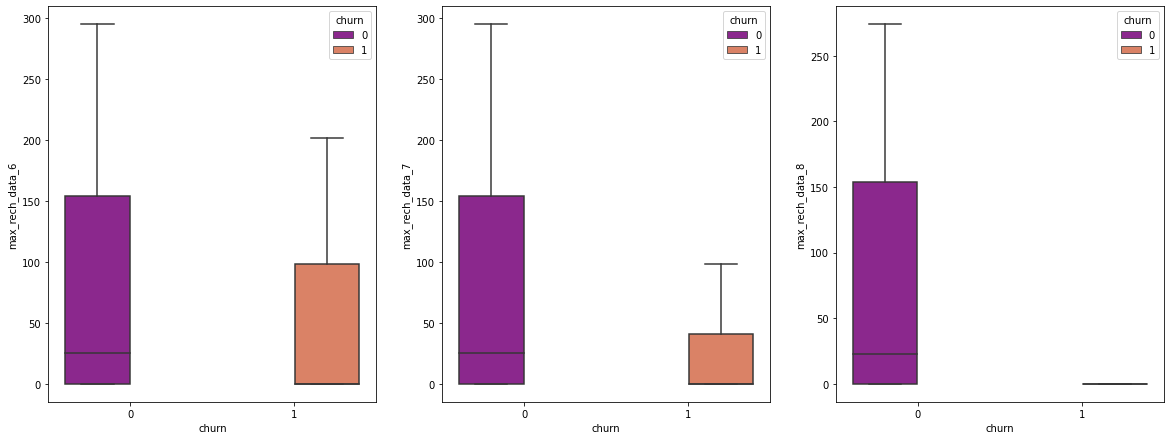

In [43]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

> We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

In [44]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('day')]

In [45]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

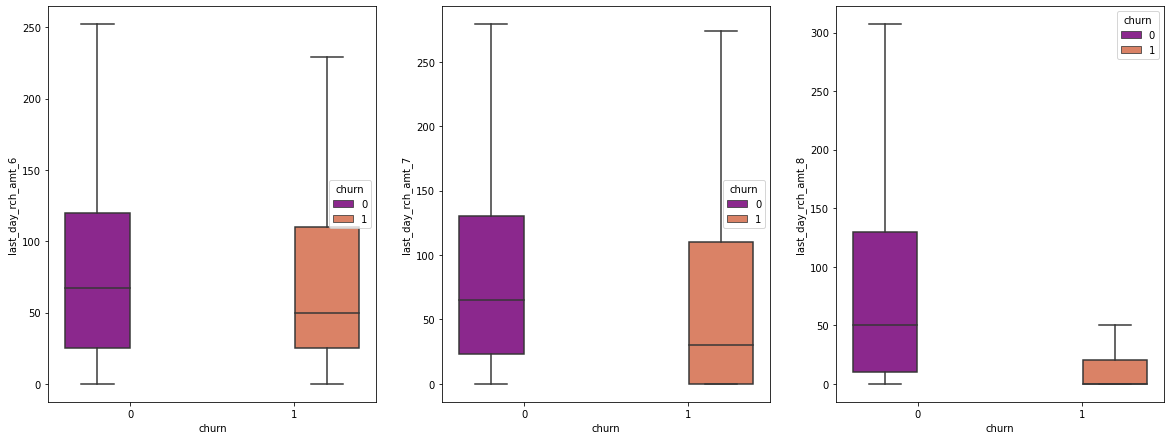

In [46]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

> We are getting a huge drop in 8th month recharge amount for churned customers.

In [47]:
#2G and 3G usage related attributes
usage_2g_and_3g = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [48]:
#let us check the % of NA values present
100*telecom_churn_data_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(telecom_churn_data_high_val_cust.loc[:,usage_2g_and_3g])

count_rech_2g_6    44.112443
count_rech_2g_7    43.117551
count_rech_2g_8    46.799987
count_rech_3g_6    44.112443
count_rech_3g_7    43.117551
count_rech_3g_8    46.799987
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.112443
arpu_3g_7          43.117551
arpu_3g_8          46.799987
arpu_2g_6          44.112443
arpu_2g_7          43.117551
arpu_2g_8          46.799987
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
dtype: float64

> We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user. Although we have 2G/3G volume usage based data available, we can drop these columns.

In [49]:
telecom_churn_data_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

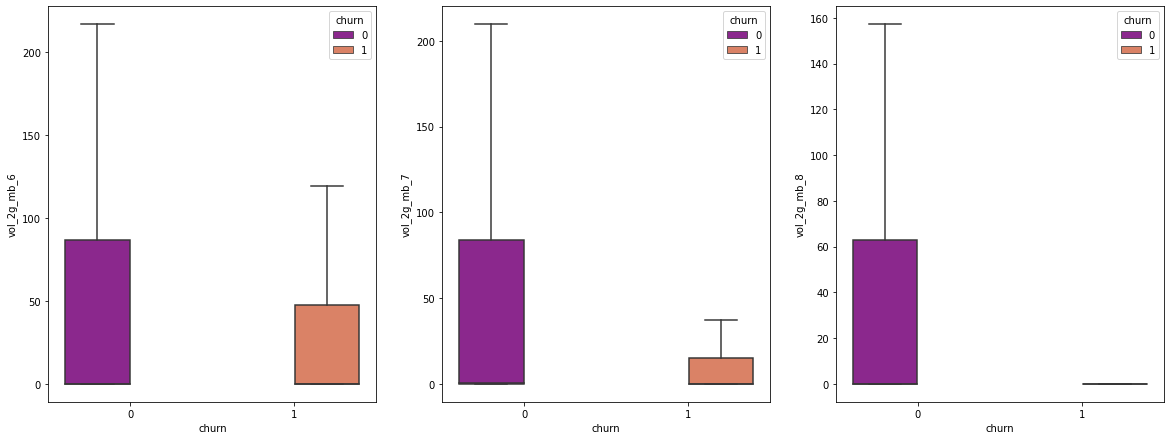

In [50]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

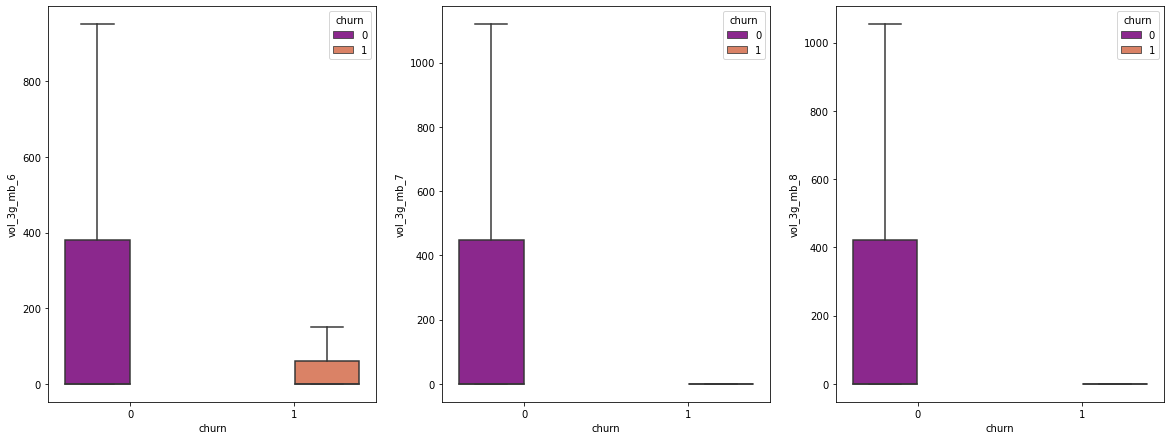

In [51]:
plot_box_chart('vol_3g_mb')

> We have two observations from above: \
    \
    1) 2G and 3G usage for churned customers drops in 8th month \
    \
    2) We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [52]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [53]:
#Checking Null value
100*telecom_churn_data_high_val_cust.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(telecom_churn_data_high_val_cust.loc[:,monthly_subcription_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [54]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

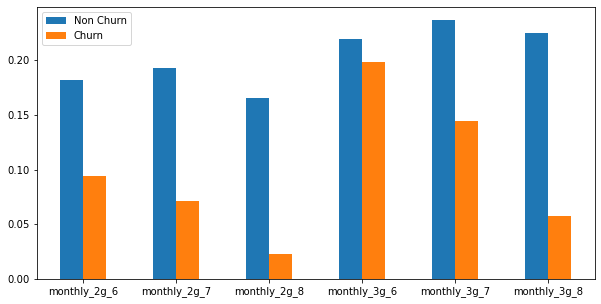

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [55]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, monthly_subcription_2g_3g)

> Again we can see a drop in monthly subscription for churned customers in 8th Month.

In [56]:
# let's check Volume based cost 
vbc_column = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [57]:
# Renaming month named vbc columns to 6,7,8,9 format
telecom_churn_data_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_churn_data_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

In [58]:
vbc_column = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

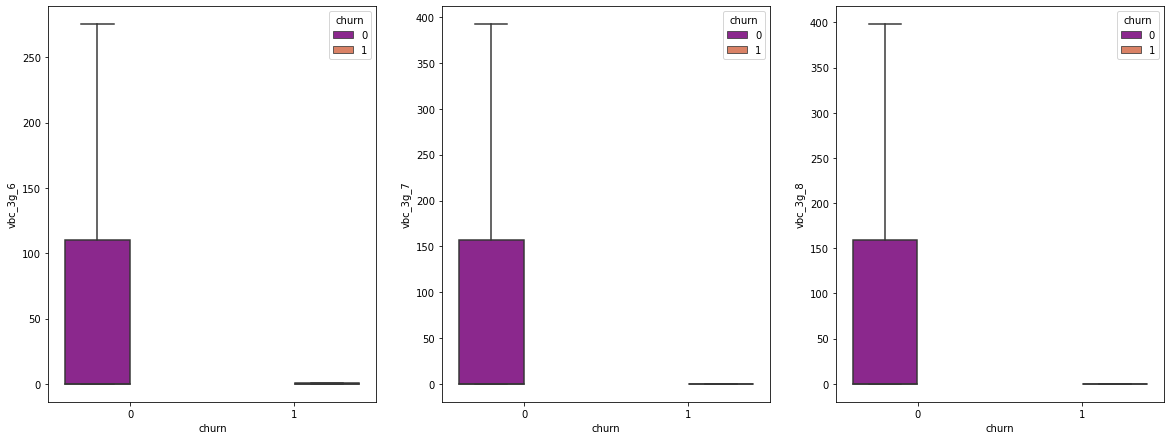

In [59]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

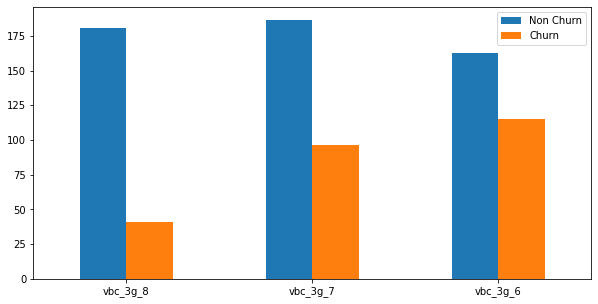

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.622636,186.370503,162.557305
Churn,40.940884,96.340707,115.461780


In [60]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, vbc_column)

> It is showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [61]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

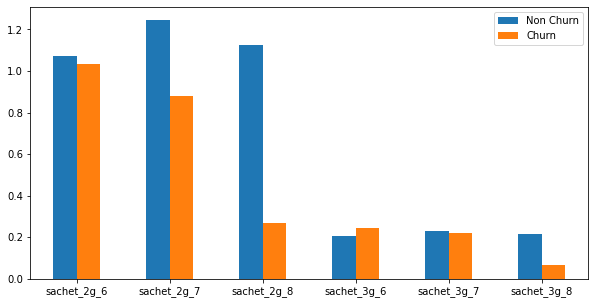

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.070531,1.245203,1.125145,0.206577,0.228307,0.214571
Churn,1.032470,0.879984,0.270859,0.244554,0.221948,0.065351


In [62]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, SC_2g_or_3g_col)

> We can see the drop in sachet services in 8th month for churned customers

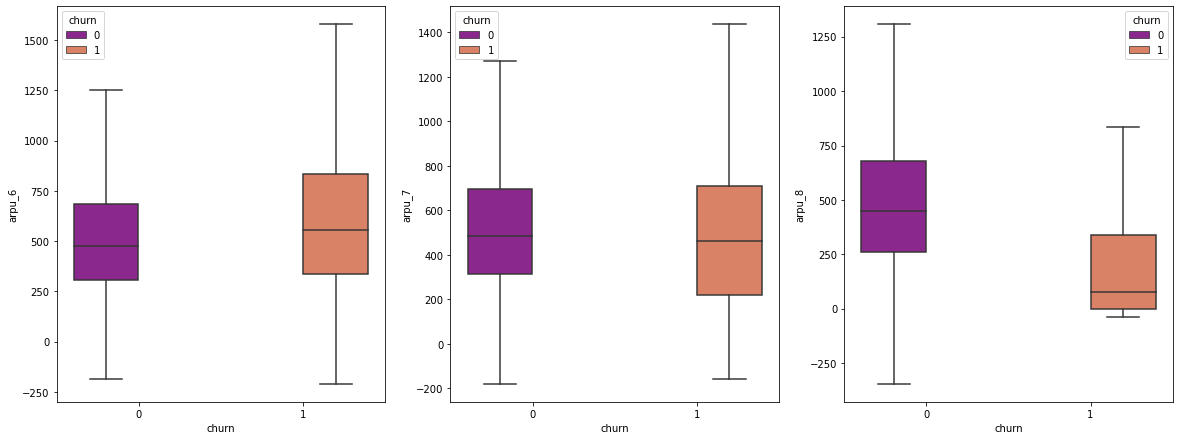

In [63]:
#Average Revenue Per User
# Checking columns for average revenue per user
arpu_cols = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

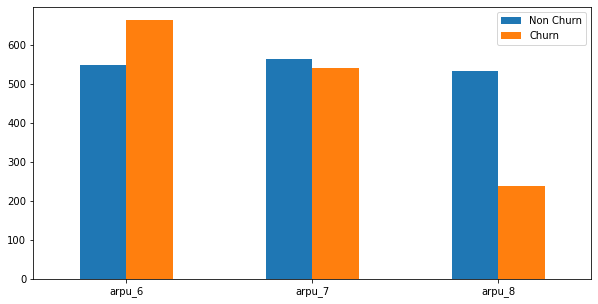

,arpu_6,arpu_7,arpu_8
Non Churn,549.546959,562.929990,532.869746
Churn,663.709368,541.146131,237.655478


In [64]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, arpu_cols)

> We can see that huge drops for Average Revenue Per User in 8th month for churned customers

In [65]:
#Minutes of usage - voice calls
mou_cols = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('mou')]

In [66]:
#Checking Null value
100*telecom_churn_data_high_val_cust.loc[:,mou_cols].isnull().sum()/len(telecom_churn_data_high_val_cust.loc[:,mou_cols])

onnet_mou_6     1.809502
onnet_mou_7     1.789470
onnet_mou_8     3.912797
offnet_mou_6    1.809502
offnet_mou_7    1.789470
                  ...   
spl_ic_mou_7    1.789470
spl_ic_mou_8    3.912797
isd_ic_mou_6    1.809502
isd_ic_mou_7    1.789470
isd_ic_mou_8    3.912797
Length: 81, dtype: float64

> So for all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [67]:
# replaceing null values by 0 for minutes of usage variables
telecom_churn_data_high_val_cust.loc[:,mou_cols] = telecom_churn_data_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

##### Correlation

In [68]:
def heatmap(dataframe):
    plt.figure(figsize=(18,12))
    sns.heatmap(dataframe.corr(),cmap="YlGnBu",annot=True)
    plt.show()

In [69]:
mou_og_cols6 = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [70]:
telecom_churn_data_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,26.596033,84.574122,163.309546,6.348347,1.577380,254.240239,165.897941,179.439168,1.806292,347.147123,2.174995,5.825077,610.058005
std,116.274169,228.962993,250.218928,22.139546,6.308138,378.546516,403.990737,409.143255,11.988810,608.845412,45.888834,17.579228,691.178402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,116.640000
50%,0.000000,24.360000,77.260000,0.000000,0.000000,124.590000,2.710000,16.360000,0.000000,45.080000,0.000000,0.230000,410.630000
75%,0.000000,78.060000,209.030000,4.230000,0.000000,332.310000,109.560000,154.540000,0.000000,465.290000,0.000000,5.210000,859.030000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


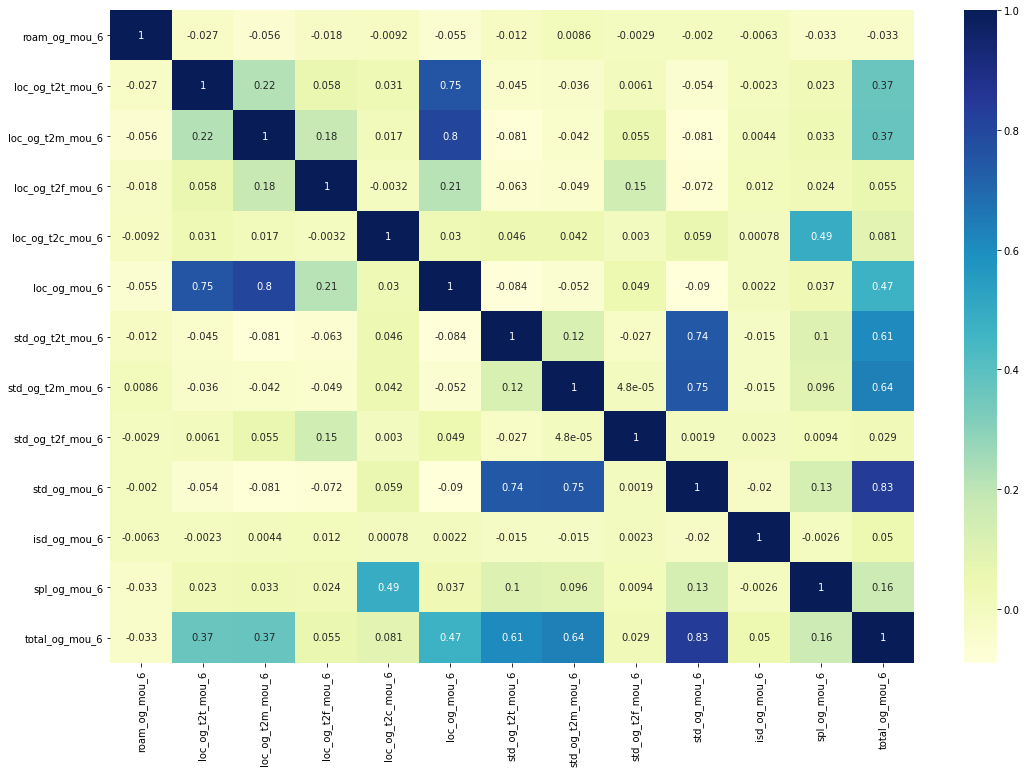

In [71]:
heatmap(telecom_churn_data_high_val_cust.filter(mou_og_cols6))

> We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fields and they needs to be dropped to avoid any multicolinearity issues.

In [72]:
list_total_og_cols = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_churn_data_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)

In [73]:
# Checking for incoming mou variables
mou_ic_cols6 = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [74]:
telecom_churn_data_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,65.508916,150.474219,15.291721,231.284489,14.896832,29.212448,2.698829,46.811695,290.121569,0.061047,10.800999
std,76.344227,163.855393,219.321437,45.785255,315.005426,77.750215,98.279300,19.114766,137.597749,365.739944,0.188124,76.789627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,28.090000,0.000000,47.910000,0.000000,0.000000,0.000000,1.030000,72.890000,0.000000,0.000000
50%,0.000000,25.080000,84.110000,1.840000,134.560000,0.380000,5.000000,0.000000,11.410000,183.780000,0.000000,0.000000
75%,0.000000,67.480000,188.740000,11.980000,297.260000,8.190000,23.630000,0.110000,41.490000,372.160000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


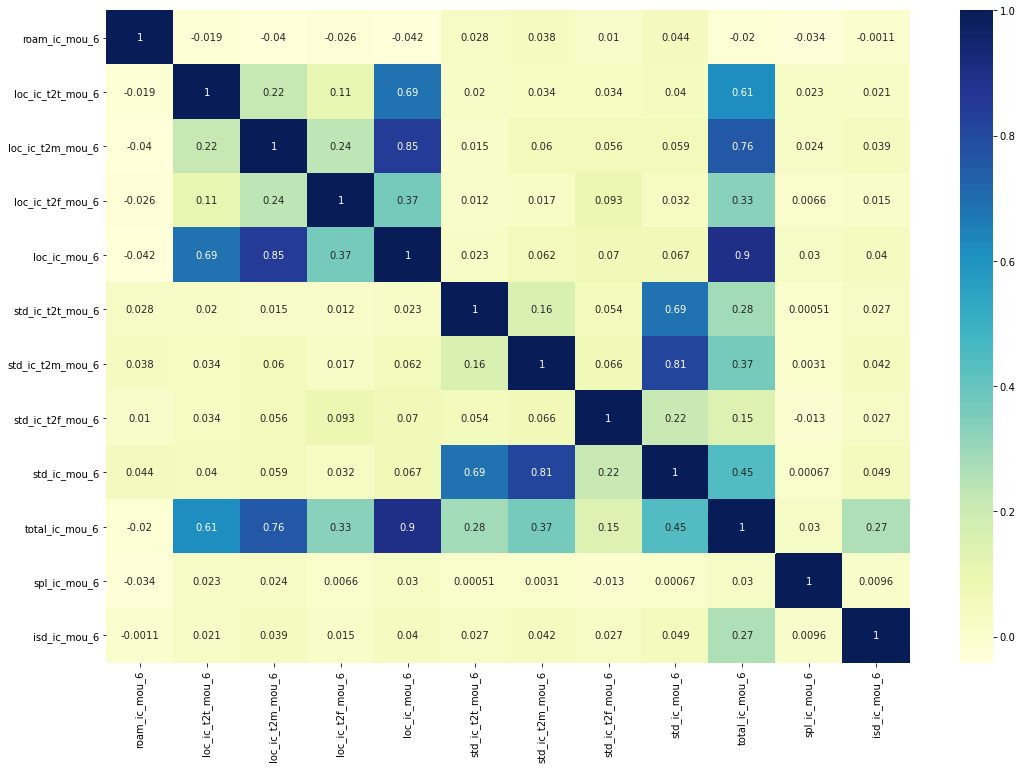

In [75]:
heatmap(telecom_churn_data_high_val_cust.filter(mou_ic_cols6))

> We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [76]:
list_total_ic_cols = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_churn_data_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)

In [77]:
#Offnet Usage

offnet_usage_service_col = telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

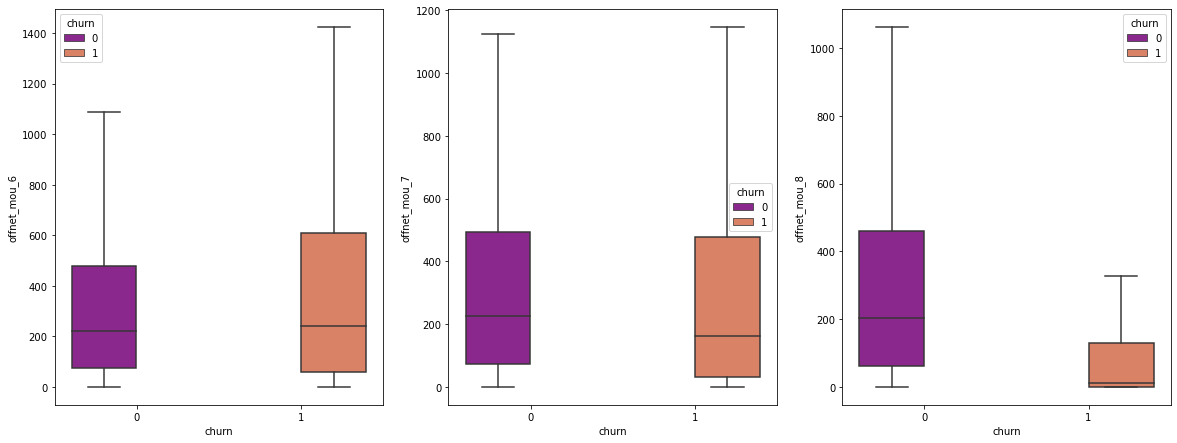

In [78]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

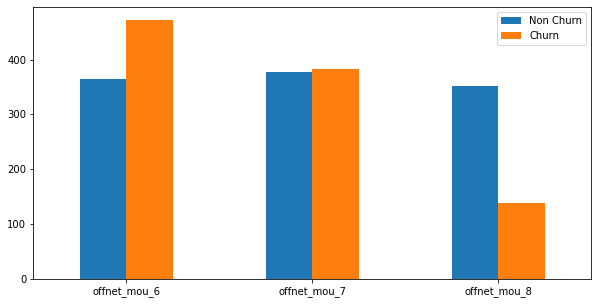

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.123076,377.875572,352.504090
Churn,471.950838,382.277222,138.523181


In [79]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, offnet_usage_service_col)

> We can see the drop for offnet mou services in the 8th month

In [80]:
# ONNET : All kind of calls within the same operator network

#minutes of usage related columns
onnet_usage_service =  telecom_churn_data_high_val_cust.columns[telecom_churn_data_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

In [81]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

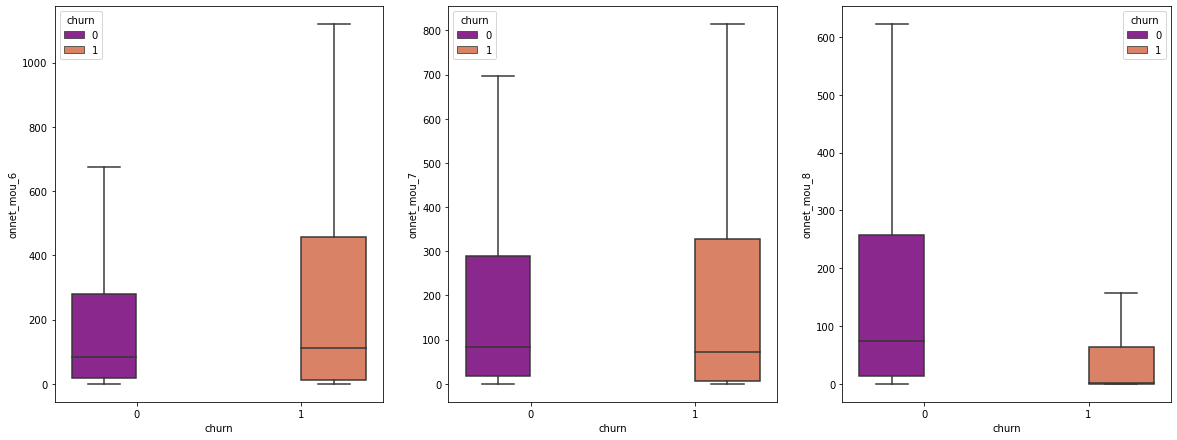

In [82]:
# Plotting offnet
plot_box_chart('onnet_mou')

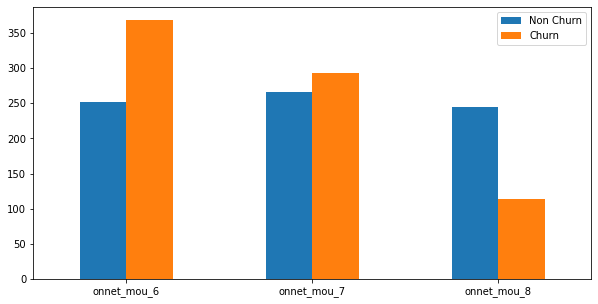

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.374116,265.859670,245.030935
Churn,368.659420,292.846601,113.478011


In [83]:
plot_mean_bar_chart(telecom_churn_data_high_val_cust, onnet_usage_service)

> We also see that there is a drop in Onnet usage in the 8th month for churned customers

##### Checking columns with more than 30% NA values.

In [84]:
null_check = pd.DataFrame(round(telecom_churn_data_high_val_cust.isnull().sum() * 100 / len(telecom_churn_data_high_val_cust), 2), columns= ['percentage'])

In [85]:
null_check = null_check.loc[null_check['percentage'] > 30]

In [86]:
#Dropping 30% column
telecom_churn_data_high_val_cust.drop(telecom_churn_data_high_val_cust[null_check.index],axis=1,inplace=True)

In [87]:
telecom_churn_data_high_val_cust.shape

(29953, 121)

##### Replacing NAN values

In [88]:
null_check = pd.DataFrame(round(telecom_churn_data_high_val_cust.isnull().sum() * 100 / len(telecom_churn_data_high_val_cust), 2), columns= ['percentage'])

In [89]:
null_check = null_check.loc[null_check['percentage'] > 0]

In [90]:
null_check.index

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [91]:
numeric_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [92]:
# Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis
for i in numeric_col:
    telecom_churn_data_high_val_cust.loc[telecom_churn_data_high_val_cust[i].isnull(),i] = 0

#### Derive new features

In [93]:
telecom_churn_data_final = telecom_churn_data_high_val_cust
print(telecom_churn_data_final.shape)
telecom_churn_data_final.head(3)

(29953, 121)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0


In [94]:
telecom_churn_data_final.drop(["total_avg_rech_amt_6_7"],axis=1,inplace=True)

In [95]:
col_list = telecom_churn_data_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_churn_data_final[avg_col_name] = (telecom_churn_data_final[col_6]  + telecom_churn_data_final[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [96]:
col_list_to_drop = telecom_churn_data_final.filter(regex='_6|_7')
telecom_churn_data_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_churn_data_final.shape)

(29953, 81)


In [97]:
telecom_churn_data_final.head(3)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0


> We have merged most of the columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 81.

## Modelling

#### PCA : Principal Component Analysis

In [98]:
telecom_pca = telecom_churn_data_final

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA


In [100]:
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=42)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [101]:
def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    print("Shape of train datatset before : "+str(x_train.shape))
    print("Percenatge of Churned customer data : "+str(round(100*Y.sum()/len(Y),2)))
    print("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE()
    x_tr,y_tr = smote.fit_sample(x_train,y_train)
    print("Shape of train datatset after SMOTE : "+str(x_tr.shape))

    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    print("Shape of train datatset after PCA : "+str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test

In [102]:
def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y

In [103]:
X,Y=split_data(telecom_pca)

In [104]:
display(X.head(2))
display(Y.head(2))

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.60,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.0,12.01,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.06,0.0


0    1
7    1
Name: churn, dtype: int64

##### Percentage distribution of churn/non-churn cutomer data

In [105]:
print("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

Percenatge of Churned Customer data : 8.12


In [106]:
#Scaling the data so as to normalize all the fields
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

(29953, 79)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.587674,-0.510841,-0.695309,-0.168679,-0.189787,-0.343476,-0.649478,-0.301900,-0.238110,-0.373493,...,1.675546,0.640631,-0.367143,-0.286068,-0.461204,-0.472415,1.358301,-0.230564,-0.301013,-0.194187
1,5.302613,-0.396856,-0.019115,0.257863,0.173388,-0.166450,0.044793,2.425615,-0.238110,-0.343304,...,-0.765285,-0.743309,-0.419584,-0.425468,-0.461204,-0.472415,-0.391449,-0.230564,-0.381270,-0.397513
2,-0.739908,-0.434372,-0.412142,-0.168679,-0.189787,-0.288584,-0.433257,-0.301900,0.762241,-0.316735,...,-0.019475,-0.257283,0.174018,0.021262,0.828299,-0.265486,-0.391449,-0.230564,0.884275,-0.254701
3,0.256647,-0.325248,1.345016,-0.168679,-0.189787,-0.240899,-0.201077,-0.220941,-0.238110,-0.218176,...,-0.765285,-0.743309,-0.419584,-0.425468,-0.461204,-0.472415,-0.391449,-0.230564,-0.429770,-0.397513
4,-0.282646,-0.437642,-0.268131,-0.168679,-0.189787,-0.195895,-0.013904,-0.301900,2.239684,-0.373493,...,0.101597,0.234236,-0.418783,-0.069077,-0.461204,-0.472415,1.358301,-0.230564,-0.363788,-0.110275


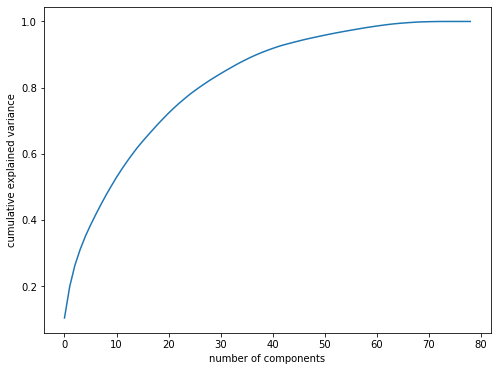

,PC1,PC2,PC3,Feature
0,0.000556,0.294716,0.154905,arpu_8
1,-0.112810,0.114988,0.149637,onnet_mou_8
2,-0.104630,0.199573,0.114285,offnet_mou_8
3,-0.007768,0.050446,0.007028,roam_ic_mou_8
4,-0.022813,0.069574,0.029853,roam_og_mou_8
5,-0.030653,0.098338,0.024347,loc_og_t2t_mou_8
6,-0.031542,0.176698,-0.027159,loc_og_t2m_mou_8
7,0.009128,0.109241,-0.091910,loc_og_t2f_mou_8
8,-0.014519,0.015865,0.079296,loc_og_t2c_mou_8
9,-0.109851,0.069713,0.155442,std_og_t2t_mou_8


In [107]:
pca = get_scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [108]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.34,  19.83,  26.28,  31.01,  34.99,  38.42,  41.6 ,  44.64,
        47.53,  50.26,  52.88,  55.32,  57.61,  59.77,  61.85,  63.73,
        65.53,  67.3 ,  69.04,  70.69,  72.3 ,  73.81,  75.24,  76.57,
        77.88,  79.06,  80.18,  81.26,  82.3 ,  83.28,  84.23,  85.16,
        86.06,  86.95,  87.79,  88.58,  89.34,  90.04,  90.69,  91.3 ,
        91.86,  92.4 ,  92.88,  93.3 ,  93.71,  94.11,  94.5 ,  94.86,
        95.2 ,  95.54,  95.87,  96.18,  96.49,  96.79,  97.07,  97.35,
        97.63,  97.9 ,  98.16,  98.4 ,  98.63,  98.84,  99.05,  99.23,
        99.39,  99.52,  99.64,  99.75,  99.85,  99.9 ,  99.94,  99.98,
       100.  , 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

> Looks like 50 components are enough to describe 95% of the variance in the dataset. We'll choose 50 components for our modeling

In [109]:
x_train, x_test, y_train, y_test = resampling_data(X_scaled, Y, 50)

Shape of train datatset before : (20967, 79)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 79)
Shape of train datatset after PCA : (38528, 50)


In [110]:
x_train.shape

(38528, 50)

In [111]:
from sklearn import svm
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

def get_regression_data(df):
    X,Y=split_data(df)
    x_train, x_test, y_train, y_test = resampling_data(scale_data(X),Y,50)
    return x_train, x_test, y_train, y_test

consolidate_summary = pd.DataFrame()

def print_model_metrics(y_test,y_pred,model_name):
    print(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    print(cp)
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Recall','Precision','AUC','F1'])
    add_to_global_summary(df)
    return df 


def get_svm_model_stats(x_train, x_test, y_train, y_test,kernel): 
    model = svm.SVC(kernel=kernel) # build model
    model.fit(x_train, y_train) # fit model
    predictions = model.predict(x_test) # print
    accuracy_score = round(metrics.accuracy_score(y_true=y_test, y_pred=predictions),2)
    print("Model selected - "+kernel.upper()+" and accuracy score for kernal is "+str(accuracy_score*100))
    model_name = "SVM (Default)-"+kernel
    print_model_metrics(y_test,predictions,model_name)
    return None
    
def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

### DecisionTree

In [112]:
telecom_dt = telecom_churn_data_final
x_train, x_test, y_train, y_test = get_regression_data(telecom_dt)

Shape of train datatset before : (20967, 79)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 79)
Shape of train datatset after PCA : (38528, 50)


In [113]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [114]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(x_test)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8256
           1       0.25      0.73      0.38       730

    accuracy                           0.80      8986
   macro avg       0.61      0.77      0.63      8986
weighted avg       0.91      0.80      0.84      8986

[[6693 1563]
 [ 200  530]]
Acuracy Score 0.8038059203204986


In [115]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8038059203204986
Sensitivity:  0.726027397260274
Specificity:  0.8106831395348837
false postive rate:  0.18931686046511628
positive predictive value:  0.25322503583373146
Negative predictive value:  0.9709850573045118
Misclassification Rate:  0.19619407967950145


In [116]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   n_jobs=-1,
                    verbose=2,
                   return_train_score=True)
tree.fit(x_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  6.0min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [117]:
y_train.shape

(38528,)

In [118]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.341076,0.012990,0.002901,0.000084,1,{'max_depth': 1},0.672852,0.662081,0.661433,0.675016,...,0.668138,0.005523,39,0.666959,0.669652,0.669814,0.666418,0.667845,0.668137,0.001381
1,0.627471,0.013672,0.002762,0.000162,2,{'max_depth': 2},0.745783,0.739683,0.735790,0.755354,...,0.744342,0.006614,38,0.747453,0.742197,0.749886,0.745093,0.747591,0.746444,0.002609
2,0.929264,0.025289,0.002753,0.000128,3,{'max_depth': 3},0.770049,0.778225,0.768881,0.785464,...,0.774528,0.006411,37,0.775972,0.774057,0.774122,0.772118,0.776044,0.774463,0.001453
3,1.388777,0.226518,0.002915,0.000361,4,{'max_depth': 4},0.790164,0.788347,0.787568,0.804413,...,0.791996,0.006273,36,0.795893,0.786776,0.796022,0.792395,0.796418,0.793501,0.003662
4,1.461998,0.015210,0.004097,0.002105,5,{'max_depth': 5},0.800026,0.805476,0.808591,0.815185,...,0.806894,0.004974,35,0.811985,0.801668,0.811141,0.811018,0.812835,0.809729,0.004084


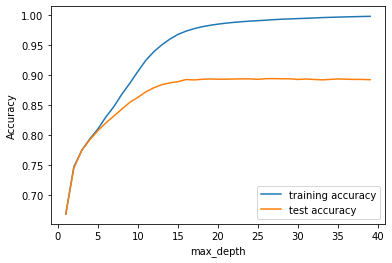

In [119]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   n_jobs=-1,
                    verbose=2,
                   return_train_score=True)
tree.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [121]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.531863,0.334228,0.003815,0.000088,5,{'min_samples_leaf': 5},0.879704,0.880223,0.881391,0.879429,...,0.879776,0.001062,1,0.961197,0.960840,0.962073,0.962885,0.962009,0.961801,0.000719
1,3.702248,0.277076,0.003534,0.000105,25,{'min_samples_leaf': 25},0.850766,0.854918,0.852063,0.862038,...,0.855923,0.004363,2,0.898060,0.897670,0.896210,0.896149,0.895630,0.896744,0.000945
2,3.206385,0.354231,0.003466,0.000166,45,{'min_samples_leaf': 45},0.835193,0.847132,0.848170,0.853212,...,0.847410,0.006614,3,0.875933,0.871618,0.873045,0.874185,0.873276,0.873611,0.001423
3,3.356786,0.226084,0.003395,0.000155,65,{'min_samples_leaf': 65},0.835323,0.839346,0.840773,0.842310,...,0.841544,0.004810,4,0.862468,0.858478,0.862468,0.864452,0.863251,0.862224,0.002009
4,3.150825,0.439488,0.003298,0.000112,85,{'min_samples_leaf': 85},0.829224,0.834674,0.834025,0.840363,...,0.836768,0.005638,5,0.854357,0.850626,0.851956,0.854751,0.855465,0.853431,0.001832


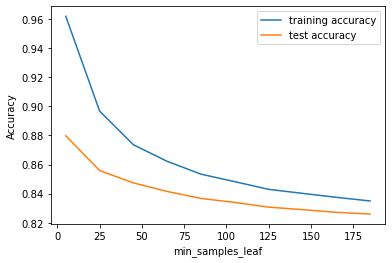

In [122]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   n_jobs=-1,
                    verbose=2,
                   return_train_score=True)
tree.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=2)

In [124]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.402376,0.513209,0.003776,0.000116,5,{'min_samples_split': 5},0.884635,0.892292,0.892032,0.890331,...,0.889561,0.002811,1,0.993673,0.994128,0.994387,0.993998,0.994517,0.994141,0.000297
1,5.162119,0.439277,0.003735,0.000117,25,{'min_samples_split': 25},0.871658,0.878277,0.880483,0.878650,...,0.877336,0.002994,2,0.958504,0.959088,0.960483,0.958245,0.958375,0.958939,0.000824
2,5.009699,0.174356,0.004419,0.001074,45,{'min_samples_split': 45},0.862315,0.871658,0.869452,0.874367,...,0.869809,0.004064,3,0.937123,0.935858,0.937609,0.938779,0.936638,0.937202,0.000978
3,5.083084,0.352298,0.003703,0.000105,65,{'min_samples_split': 65},0.855048,0.865559,0.864132,0.871123,...,0.864177,0.005181,4,0.921517,0.920998,0.924015,0.923564,0.922136,0.922446,0.001163
4,5.040567,0.432181,0.003669,0.000179,85,{'min_samples_split': 85},0.849598,0.864002,0.860109,0.863984,...,0.859401,0.005269,5,0.909253,0.909480,0.911914,0.912241,0.910294,0.910636,0.001231


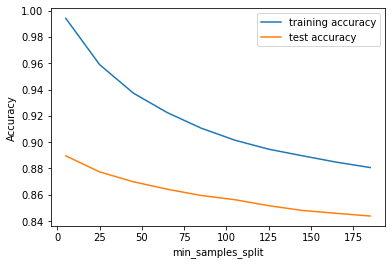

In [125]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [126]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 2, n_jobs = -1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 46.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True, verbose=2)

In [127]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.954381,0.086958,0.004594,0.003189,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.79795,...,0.802845,0.004408,301,0.808351,0.805042,0.807151,0.807157,0.807773,0.807095,0.001119
1,2.758591,0.204578,0.003124,0.000211,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.79795,...,0.802741,0.004354,302,0.808157,0.805009,0.807118,0.807157,0.807579,0.807004,0.001065
2,2.704473,0.202479,0.002814,0.000089,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.79795,...,0.802741,0.004354,302,0.808157,0.805009,0.807118,0.807157,0.807579,0.807004,0.001065
3,2.542559,0.066851,0.002804,0.000075,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.79795,...,0.802741,0.004354,302,0.808157,0.805009,0.807118,0.807157,0.807579,0.807004,0.001065
4,2.809136,0.249010,0.002865,0.000062,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.79795,...,0.802741,0.004354,302,0.808157,0.805009,0.807118,0.807157,0.807579,0.807004,0.001065


In [128]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8605950342847875
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [129]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [130]:
y_pred_default = clf_gini.predict(x_test)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6836, 1420],
       [ 239,  491]])

In [131]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6726027397260274
Specificity:  0.8280038759689923
false postive rate:  0.17199612403100775
positive predictive value:  0.25693354264782836
Negative predictive value:  0.9662190812720848
Misclassification Rate:  0.18462052081014912


### Tree Model Regression (Random Forest)

> Let's first fit a random forest model with default hyperparameters.

In [132]:
telecom_tree = telecom_churn_data_final
x_train, x_test, y_train, y_test = get_regression_data(telecom_tree)

Shape of train datatset before : (20967, 79)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 79)
Shape of train datatset after PCA : (38528, 50)


In [133]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [134]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [135]:
# Making predictions
predictions = rfc.predict(x_test)

In [136]:
print_model_metrics(y_test,predictions,"RandomForest (Default)")

RandomForest (Default) Model Stats Scores Summary : 
[[7787  469]
 [ 318  412]]


,Model,Accuracy,Recall,Precision,AUC,F1
0,RandomForest (Default),0.91,0.56,0.47,0.75,0.51


> So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

#### Hyperparameter Tuning

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds, verbose = 2, n_jobs = -1, scoring="accuracy",return_train_score=True)
    
    rf.fit(x_train, y_train)
    
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Tuning max_depth
 > Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.8min finished


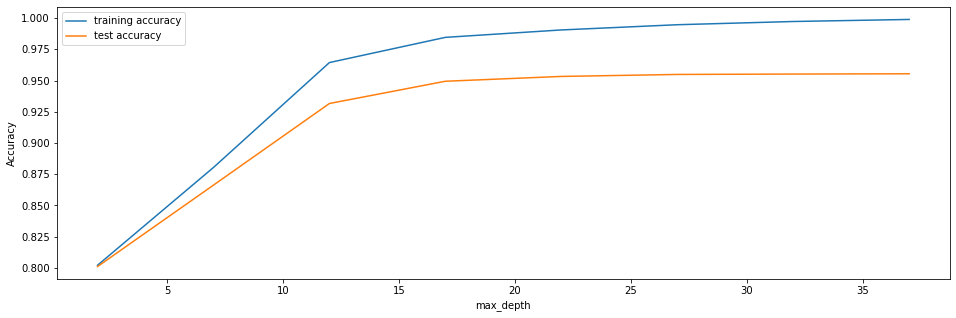

In [138]:
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,x_train,y_train)

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score becomme stagnant. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest. 12 and 18 value have peek convergens and can be used for grid veiw search.

Tuning n_estimators

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.9min finished


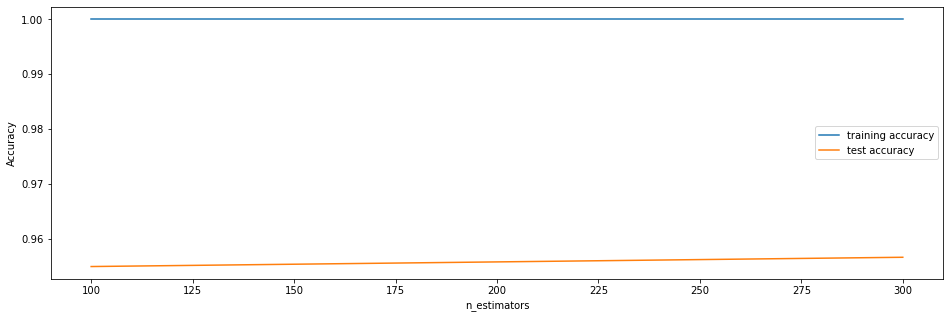

In [139]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 200)}
tune_hyperparameter(parameters,x_train,y_train)

Score almost remain the same with very low dip throught the range. We wull use 200 for grid view search.

Tuning max_features

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 25.6min finished


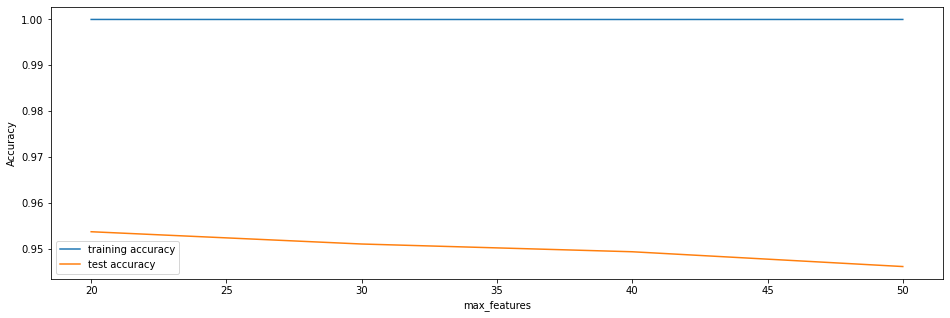

In [140]:
# parameters to build the model on
parameters = {'max_features': [20,30,40,50]}
tune_hyperparameter(parameters,x_train,y_train,4)

Apparently, accuracy of training seems to be stable and test scores seems to increase till 30 and then decrease. Again we see increase on 40 and we will use that.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.9min finished


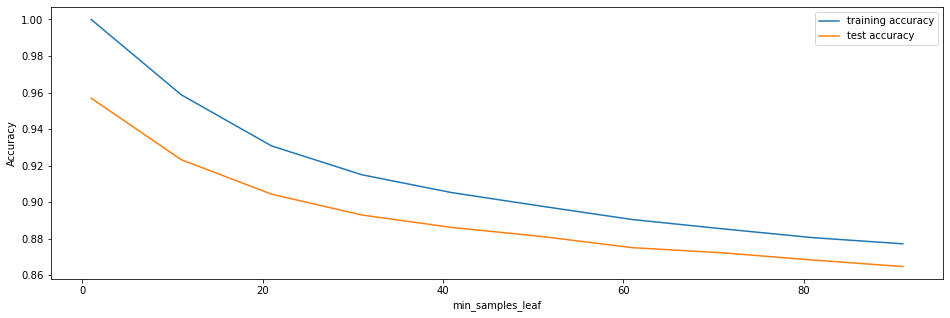

In [141]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)

We can see that the model starts to overfit as value is decrease the value of min_samples_leaf. 10 to 20 seems to be a good range and that will be used in grid search.

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 14.3min finished


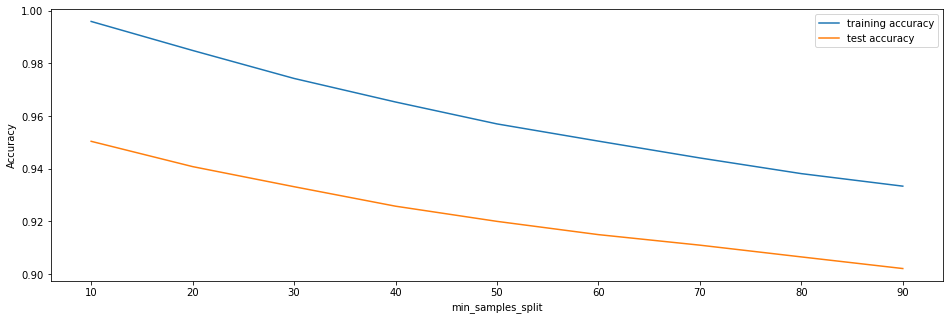

In [142]:
# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)


Range 10 to 30 is optimal with good accuracy.

Grid Search to Find Optimal Hyperparameters

In [143]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 2,return_train_score=True)

In [144]:
# Fit the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 95.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 161.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12, 18], 'max_features': [40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [200]},
             return_train_score=True, verbose=2)

In [145]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

We can get accuracy of 0.93 using {'max_depth': 18, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [146]:
print("Max accuracy with Random Forest classifier - "+str(round(rf_grid_search.best_score_,2)))

Max accuracy with Random Forest classifier - 0.93


#### Building and Evaluating the Final Model for Random Forest

In [147]:
rfc = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features=40, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1)

In [148]:
# Making predictions
predictions = rfc.predict(x_test)

In [149]:
# Printing confusion matrix
print_model_metrics(y_test,predictions,'RandomForest (Hyper)')

RandomForest (Hyper) Model Stats Scores Summary : 
[[7557  699]
 [ 258  472]]


,Model,Accuracy,Recall,Precision,AUC,F1
0,RandomForest (Hyper),0.89,0.65,0.4,0.78,0.5


### XGBoost

In [150]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [151]:
telecom_xgboost_df = telecom_churn_data_final.copy()
x_train, x_test, y_train, y_test = get_regression_data(telecom_xgboost_df)

Shape of train datatset before : (20967, 79)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 79)
Shape of train datatset after PCA : (38528, 50)


In [152]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
# evaluate predictions
y_pred = model.predict(x_test)

In [154]:
print_model_metrics(y_test, y_pred ,'XGBoost (Default)')

XGBoost (Default) Model Stats Scores Summary : 
[[7654  602]
 [ 278  452]]


,Model,Accuracy,Recall,Precision,AUC,F1
0,XGBoost (Default),0.9,0.62,0.43,0.77,0.51


In [155]:
#Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 2,
                        return_train_score=True)     

In [156]:
# fit the model
model_cv.fit(x_train, y_train)   

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.5min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [157]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [158]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

We can get accuracy of **0.88** using {'learning_rate': 0.3, 'subsample': 0.5}


In [159]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='right left')
        plt.xscale('log')

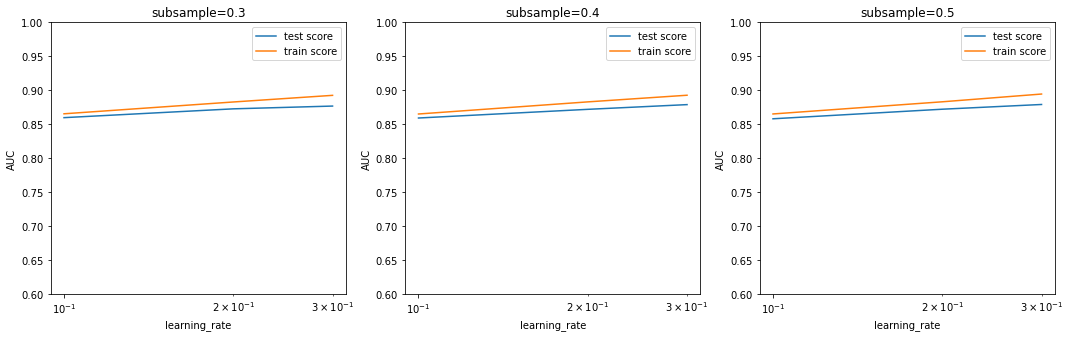

In [160]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)

> The results show that a subsample size of 0.5 and learning_rate of about 0.3 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

In [161]:
#Let's build a final model with the chosen hyperparameters.
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(x_train, y_train)

[03:41:44] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [162]:
# predict
y_pred = model.predict(x_test)

In [163]:
print_model_metrics(y_test, y_pred,'XGBoost (Hyper Tuned)')

XGBoost (Hyper Tuned) Model Stats Scores Summary : 
[[7144 1112]
 [ 185  545]]


,Model,Accuracy,Recall,Precision,AUC,F1
0,XGBoost (Hyper Tuned),0.86,0.75,0.33,0.81,0.46


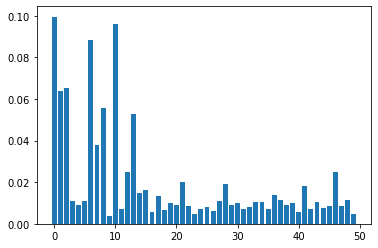

In [164]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [165]:
print("Important features ...")


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

Important features ...


,PC1,PC2,PC3,Feature
0,0.000556,0.294716,0.154905,arpu_8
1,-0.112810,0.114988,0.149637,onnet_mou_8
2,-0.104630,0.199573,0.114285,offnet_mou_8
3,-0.007768,0.050446,0.007028,roam_ic_mou_8
4,-0.022813,0.069574,0.029853,roam_og_mou_8
5,-0.030653,0.098338,0.024347,loc_og_t2t_mou_8
6,-0.031542,0.176698,-0.027159,loc_og_t2m_mou_8
7,0.009128,0.109241,-0.091910,loc_og_t2f_mou_8
8,-0.014519,0.015865,0.079296,loc_og_t2c_mou_8
9,-0.109851,0.069713,0.155442,std_og_t2t_mou_8


### Logistic Regression (Without PCA)

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm2
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [167]:
telecom_lr_df = telecom_churn_data_final.copy()
X, Y = split_data(telecom_lr_df)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,test_size=0.3,random_state=42)

In [168]:
#Scaling the data so as to normalize all the fields
X_scaled = scale_data(x_train)
print(X_scaled.shape)
X_scaled.head(5)

(20967, 79)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.814333,-0.508114,-0.647292,-0.179335,-0.185374,-0.336413,-0.563038,-0.277449,-0.259234,-0.373677,...,-0.609777,-0.318536,1.847155,-0.434368,-0.459168,1.807913,-0.391178,-0.228273,-0.431626,-0.079545
1,2.306673,7.181535,-0.382303,-0.179335,-0.185374,-0.246178,-0.580844,-0.282470,-0.259234,8.469963,...,-0.770932,-0.751343,-0.422880,-0.434368,-0.459168,-0.470459,-0.391178,-0.228273,-0.431626,-0.408426
2,-0.062387,-0.508933,-0.421754,-0.179335,-0.185374,-0.338049,-0.136685,-0.295021,-0.259234,-0.373677,...,-0.648845,-0.681983,-0.422880,-0.434368,-0.459168,-0.263334,-0.391178,-0.228273,-0.431626,-0.398045
3,-1.018001,-0.508933,-0.688797,-0.179335,-0.185374,-0.338049,-0.645181,-0.295021,-0.259234,-0.373677,...,0.195996,-0.202010,0.270516,-0.434368,0.828431,-0.470459,-0.391178,-0.228273,-0.431626,-0.326206
4,0.464633,-0.451886,2.942744,-0.179335,-0.185374,-0.224049,6.827285,-0.232264,-0.231140,-0.373677,...,-0.770932,-0.751343,-0.422880,-0.434368,-0.459168,-0.470459,-0.391178,-0.228273,-0.431626,-0.408426


In [169]:
logreg = LogisticRegression(class_weight='balanced')
rfe = RFE(logreg, 15)             # running RFE with 15 output variables
rfe = rfe.fit(x_train,y_train)

In [170]:
col = x_train.columns[rfe.support_]
features_df = pd.DataFrame(col, columns = ["Features"]) 
features_df

,Features
0,loc_og_t2c_mou_8
1,loc_ic_t2m_mou_8
2,loc_ic_t2f_mou_8
3,std_ic_t2t_mou_8
4,std_ic_t2f_mou_8
5,ic_others_8
6,total_rech_num_8
7,total_rech_data_8
8,sachet_2g_8
9,avg_loc_og_t2c_mou_av67


In [171]:
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4281.3
Date:                Mon, 31 Aug 2020   Deviance:                       8562.6
Time:                        03:42:30   Pearson chi2:                 4.15e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8479      0.058    -14.667      0.000      -0.961      -0.735
loc_og_t2c_mou_8           -0.0025      0.006     -0.404      0.686      -0.015       0.010
loc_ic_t2m_mou_8           -0.0114      0.001    -18.177      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0138      0.003     -4.366      0.000      -0.020      -0.008
std_ic_t2t_mou_8           -0.0119      0.002     -6.122      0.000      -0.016      -0.008
std_ic_t2f_mou_8           -0.0139      0.008     -1.809      0.070      -0.029       0.001
ic_others_8              5.002e-05      0.006      0.008      0.993      -0.012       0.012
total_rech_num_8           -0.1330      0.007    -19.185      0.000      -0.147      -0.119
total_rech_data_8          -0.7421      0.063    -11.706      0.000      -0.866      -0.618
sachet_2g_8                 0.5119      0.069      7.439      0.000       0.377       0.647
avg_loc_og_t2c_mou_av67    -0.0103      0.005     -2.223      0.026      -0.019      -0.001
avg_std_ic_t2t_mou_av67     0.0044      0.001      7.857      0.000       0.003       0.006
avg_ic_others_av67         -0.0035      0.005     -0.721      0.471      -0.013       0.006
avg_total_rech_num_av67     0.0624      0.004     14.443      0.000       0.054       0.071
avg_monthly_2g_av67        -0.6396      0.106     -6.047      0.000      -0.847      -0.432
avg_sachet_3g_av67          0.2033      0.042      4.835      0.000       0.121       0.286
===========================================================================================
"""

In [172]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_data_8,9.48
8,sachet_2g_8,7.63
6,total_rech_num_8,5.28
12,avg_total_rech_num_av67,4.93
5,ic_others_8,2.50
11,avg_ic_others_av67,2.49
3,std_ic_t2t_mou_8,2.07
10,avg_std_ic_t2t_mou_av67,2.06
14,avg_sachet_3g_av67,1.54
1,loc_ic_t2m_mou_8,1.49


> We can see that 'ic_others_8' can be dropped because it has high P-value

In [173]:
col=col.drop('ic_others_8')
col

Index(['loc_og_t2c_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'total_rech_num_8',
       'total_rech_data_8', 'sachet_2g_8', 'avg_loc_og_t2c_mou_av67',
       'avg_std_ic_t2t_mou_av67', 'avg_ic_others_av67',
       'avg_total_rech_num_av67', 'avg_monthly_2g_av67', 'avg_sachet_3g_av67'],
      dtype='object')

In [174]:
# Rebuilding the model
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4281.3
Date:                Mon, 31 Aug 2020   Deviance:                       8562.6
Time:                        03:42:32   Pearson chi2:                 4.15e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8479      0.058    -14.667      0.000      -0.961      -0.735
loc_og_t2c_mou_8           -0.0025      0.006     -0.404      0.686      -0.015       0.010
loc_ic_t2m_mou_8           -0.0114      0.001    -18.196      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0138      0.003     -4.367      0.000      -0.020      -0.008
std_ic_t2t_mou_8           -0.0119      0.002     -6.129      0.000      -0.016      -0.008
std_ic_t2f_mou_8           -0.0139      0.008     -1.809      0.070      -0.029       0.001
total_rech_num_8           -0.1329      0.007    -19.187      0.000      -0.147      -0.119
total_rech_data_8          -0.7421      0.063    -11.706      0.000      -0.866      -0.618
sachet_2g_8                 0.5118      0.069      7.439      0.000       0.377       0.647
avg_loc_og_t2c_mou_av67    -0.0103      0.005     -2.223      0.026      -0.019      -0.001
avg_std_ic_t2t_mou_av67     0.0044      0.001      7.864      0.000       0.003       0.006
avg_ic_others_av67         -0.0034      0.004     -0.770      0.441      -0.012       0.005
avg_total_rech_num_av67     0.0624      0.004     14.444      0.000       0.054       0.071
avg_monthly_2g_av67        -0.6396      0.106     -6.047      0.000      -0.847      -0.432
avg_sachet_3g_av67          0.2033      0.042      4.835      0.000       0.121       0.286
===========================================================================================
"""

In [175]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_data_8,9.48
7,sachet_2g_8,7.62
5,total_rech_num_8,5.28
11,avg_total_rech_num_av67,4.93
3,std_ic_t2t_mou_8,2.06
9,avg_std_ic_t2t_mou_av67,2.06
13,avg_sachet_3g_av67,1.54
1,loc_ic_t2m_mou_8,1.49
8,avg_loc_og_t2c_mou_av67,1.32
0,loc_og_t2c_mou_8,1.31


> We can drop 'loc_og_t2c_mou_8' as it has high P-value

In [176]:
col=col.drop('loc_og_t2c_mou_8')
col

Index(['loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_rech_num_8', 'total_rech_data_8',
       'sachet_2g_8', 'avg_loc_og_t2c_mou_av67', 'avg_std_ic_t2t_mou_av67',
       'avg_ic_others_av67', 'avg_total_rech_num_av67', 'avg_monthly_2g_av67',
       'avg_sachet_3g_av67'],
      dtype='object')

In [177]:
# Rebuilding the model
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4281.4
Date:                Mon, 31 Aug 2020   Deviance:                       8562.8
Time:                        03:42:33   Pearson chi2:                 4.20e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8485      0.058    -14.680      0.000      -0.962      -0.735
loc_ic_t2m_mou_8           -0.0114      0.001    -18.199      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0138      0.003     -4.369      0.000      -0.020      -0.008
std_ic_t2t_mou_8           -0.0119      0.002     -6.132      0.000      -0.016      -0.008
std_ic_t2f_mou_8           -0.0140      0.008     -1.814      0.070      -0.029       0.001
total_rech_num_8           -0.1333      0.007    -19.346      0.000      -0.147      -0.120
total_rech_data_8          -0.7424      0.063    -11.711      0.000      -0.867      -0.618
sachet_2g_8                 0.5121      0.069      7.443      0.000       0.377       0.647
avg_loc_og_t2c_mou_av67    -0.0108      0.005     -2.384      0.017      -0.020      -0.002
avg_std_ic_t2t_mou_av67     0.0044      0.001      7.869      0.000       0.003       0.006
avg_ic_others_av67         -0.0035      0.004     -0.771      0.441      -0.012       0.005
avg_total_rech_num_av67     0.0624      0.004     14.475      0.000       0.054       0.071
avg_monthly_2g_av67        -0.6397      0.106     -6.048      0.000      -0.847      -0.432
avg_sachet_3g_av67          0.2035      0.042      4.837      0.000       0.121       0.286
===========================================================================================
"""

In [178]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_data_8,9.48
6,sachet_2g_8,7.62
4,total_rech_num_8,5.23
10,avg_total_rech_num_av67,4.93
2,std_ic_t2t_mou_8,2.06
8,avg_std_ic_t2t_mou_av67,2.06
12,avg_sachet_3g_av67,1.54
0,loc_ic_t2m_mou_8,1.49
1,loc_ic_t2f_mou_8,1.18
11,avg_monthly_2g_av67,1.18


> We can drop 'avg_ic_others_av67' as it has high P-value

In [179]:
col=col.drop('avg_ic_others_av67')
col

Index(['loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_rech_num_8', 'total_rech_data_8',
       'sachet_2g_8', 'avg_loc_og_t2c_mou_av67', 'avg_std_ic_t2t_mou_av67',
       'avg_total_rech_num_av67', 'avg_monthly_2g_av67', 'avg_sachet_3g_av67'],
      dtype='object')

In [180]:
# Rebuilding the model
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4281.8
Date:                Mon, 31 Aug 2020   Deviance:                       8563.5
Time:                        03:42:34   Pearson chi2:                 4.25e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8507      0.058    -14.736      0.000      -0.964      -0.738
loc_ic_t2m_mou_8           -0.0114      0.001    -18.223      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0138      0.003     -4.370      0.000      -0.020      -0.008
std_ic_t2t_mou_8           -0.0119      0.002     -6.131      0.000      -0.016      -0.008
std_ic_t2f_mou_8           -0.0141      0.008     -1.827      0.068      -0.029       0.001
total_rech_num_8           -0.1332      0.007    -19.341      0.000      -0.147      -0.120
total_rech_data_8          -0.7419      0.063    -11.707      0.000      -0.866      -0.618
sachet_2g_8                 0.5116      0.069      7.438      0.000       0.377       0.646
avg_loc_og_t2c_mou_av67    -0.0108      0.005     -2.382      0.017      -0.020      -0.002
avg_std_ic_t2t_mou_av67     0.0044      0.001      7.859      0.000       0.003       0.006
avg_total_rech_num_av67     0.0624      0.004     14.467      0.000       0.054       0.071
avg_monthly_2g_av67        -0.6405      0.106     -6.055      0.000      -0.848      -0.433
avg_sachet_3g_av67          0.2029      0.042      4.828      0.000       0.121       0.285
===========================================================================================
"""

In [181]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_data_8,9.48
6,sachet_2g_8,7.62
4,total_rech_num_8,5.23
9,avg_total_rech_num_av67,4.92
2,std_ic_t2t_mou_8,2.06
8,avg_std_ic_t2t_mou_av67,2.06
11,avg_sachet_3g_av67,1.54
0,loc_ic_t2m_mou_8,1.48
1,loc_ic_t2f_mou_8,1.18
10,avg_monthly_2g_av67,1.18


In [182]:
# Dropping 'total_rech_data_8' because it has high VIF
col=col.drop('total_rech_data_8')
col

Index(['loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_rech_num_8', 'sachet_2g_8',
       'avg_loc_og_t2c_mou_av67', 'avg_std_ic_t2t_mou_av67',
       'avg_total_rech_num_av67', 'avg_monthly_2g_av67', 'avg_sachet_3g_av67'],
      dtype='object')

In [183]:
# Rebuilding the model
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4377.6
Date:                Mon, 31 Aug 2020   Deviance:                       8755.2
Time:                        03:42:35   Pearson chi2:                 3.11e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0707      0.055    -19.571      0.000      -1.178      -0.963
loc_ic_t2m_mou_8           -0.0113      0.001    -18.138      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0159      0.003     -4.864      0.000      -0.022      -0.010
std_ic_t2t_mou_8           -0.0116      0.002     -6.014      0.000      -0.015      -0.008
std_ic_t2f_mou_8           -0.0168      0.008     -2.095      0.036      -0.032      -0.001
total_rech_num_8           -0.1463      0.007    -20.747      0.000      -0.160      -0.133
sachet_2g_8                -0.2209      0.028     -7.818      0.000      -0.276      -0.166
avg_loc_og_t2c_mou_av67    -0.0109      0.004     -2.642      0.008      -0.019      -0.003
avg_std_ic_t2t_mou_av67     0.0045      0.001      7.931      0.000       0.003       0.006
avg_total_rech_num_av67     0.0764      0.004     17.946      0.000       0.068       0.085
avg_monthly_2g_av67        -0.9271      0.102     -9.087      0.000      -1.127      -0.727
avg_sachet_3g_av67         -0.0051      0.028     -0.182      0.856      -0.060       0.050
===========================================================================================
"""

In [184]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_num_8,5.01
8,avg_total_rech_num_av67,4.83
2,std_ic_t2t_mou_8,2.06
7,avg_std_ic_t2t_mou_av67,2.06
0,loc_ic_t2m_mou_8,1.48
5,sachet_2g_8,1.34
1,loc_ic_t2f_mou_8,1.18
9,avg_monthly_2g_av67,1.11
10,avg_sachet_3g_av67,1.10
6,avg_loc_og_t2c_mou_av67,1.09


In [185]:
# dropping the 'avg_sachet_3g_av67' as it has high P-value
col=col.drop('avg_sachet_3g_av67')
col

Index(['loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'total_rech_num_8', 'sachet_2g_8',
       'avg_loc_og_t2c_mou_av67', 'avg_std_ic_t2t_mou_av67',
       'avg_total_rech_num_av67', 'avg_monthly_2g_av67'],
      dtype='object')

In [186]:
# Rebuilding the model
X_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20956
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4377.6
Date:                Mon, 31 Aug 2020   Deviance:                       8755.2
Time:                        03:42:36   Pearson chi2:                 3.11e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0712      0.055    -19.606      0.000      -1.178      -0.964
loc_ic_t2m_mou_8           -0.0113      0.001    -18.139      0.000      -0.013      -0.010
loc_ic_t2f_mou_8           -0.0159      0.003     -4.864      0.000      -0.022      -0.010
std_ic_t2t_mou_8           -0.0116      0.002     -6.013      0.000      -0.015      -0.008
std_ic_t2f_mou_8           -0.0168      0.008     -2.096      0.036      -0.032      -0.001
total_rech_num_8           -0.1463      0.007    -20.747      0.000      -0.160      -0.132
sachet_2g_8                -0.2212      0.028     -7.842      0.000      -0.277      -0.166
avg_loc_og_t2c_mou_av67    -0.0109      0.004     -2.639      0.008      -0.019      -0.003
avg_std_ic_t2t_mou_av67     0.0045      0.001      7.933      0.000       0.003       0.006
avg_total_rech_num_av67     0.0764      0.004     18.016      0.000       0.068       0.085
avg_monthly_2g_av67        -0.9269      0.102     -9.085      0.000      -1.127      -0.727
===========================================================================================
"""

In [187]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_num_8,5.00
8,avg_total_rech_num_av67,4.76
2,std_ic_t2t_mou_8,2.06
7,avg_std_ic_t2t_mou_av67,2.06
0,loc_ic_t2m_mou_8,1.48
5,sachet_2g_8,1.32
1,loc_ic_t2f_mou_8,1.18
9,avg_monthly_2g_av67,1.11
6,avg_loc_og_t2c_mou_av67,1.09
3,std_ic_t2f_mou_8,1.03


> Here we can see that all columns are significant from Pvalues and all VIF values are under 5. This Model seems to be a pretty good fit.

In [188]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(x_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [189]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(x_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [190]:
#Making prediction on the test data
pred_test = logsk.predict_proba(x_test[col])
y_pred_default = logsk.predict(x_test[col])

In [191]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8248
           1       0.23      0.82      0.36       738

    accuracy                           0.76      8986
   macro avg       0.60      0.79      0.60      8986
weighted avg       0.92      0.76      0.81      8986

[[6183 2065]
 [ 132  606]]
accuracy_score :  0.7555085688849321


In [192]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [193]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8685678748761301


In [194]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

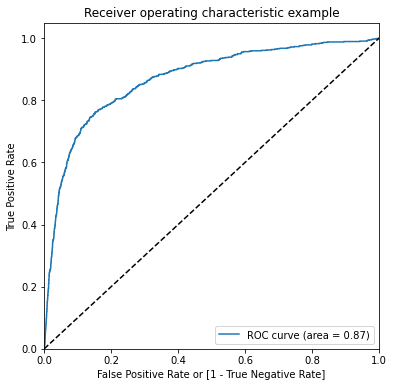

(array([0.00000000e+00, 1.21241513e-04, 1.21241513e-04, ...,
        9.99757517e-01, 9.99878758e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00135501, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99999985e+00, 9.99999849e-01, 9.99896976e-01, ...,
        3.91422252e-12, 3.48581420e-13, 4.06976956e-16]))

In [195]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [196]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.745687,1,1,1,1,1,1,1,1,0,0
1,0,0.042785,1,0,0,0,0,0,0,0,0,0
2,0,0.528977,1,1,1,1,1,1,0,0,0,0
3,0,0.339734,1,1,1,1,0,0,0,0,0,0
4,0,0.158769,1,1,0,0,0,0,0,0,0,0


In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082128  0.000000  1.000000
0.1   0.1  0.323058  0.265155  0.970190
0.2   0.2  0.452482  0.407493  0.955285
0.3   0.3  0.566771  0.535160  0.920054
0.4   0.4  0.665034  0.645490  0.883469
0.5   0.5  0.755509  0.749636  0.821138
0.6   0.6  0.840975  0.848448  0.757453
0.7   0.7  0.902738  0.929195  0.607046
0.8   0.8  0.922769  0.974297  0.346883
0.9   0.9  0.920877  0.991998  0.126016


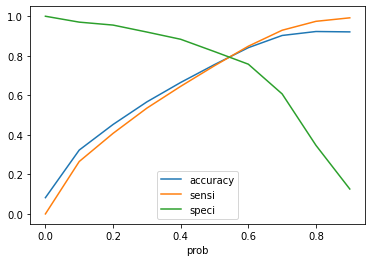

In [198]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [199]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5440238204601665]


In [200]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.54 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_pred_final.churn.value_counts()

0    8248
1     738
Name: churn, dtype: int64

In [201]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6527, 1721],
       [ 150,  588]])

In [202]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.7555085688849321
Sensitivity:  0.7967479674796748
Specificity:  0.7913433559650824
false postive rate:  0.20865664403491754
positive predictive value:  0.2546556951061065
Negative predictive value:  0.9775348210274075


#### HyperParameter Tuning Logistic Regression

In [203]:
# step-1: create a cross-validation scheme
folds = 5
c_space = np.logspace(-4, 4, 15)
# step-2: specify range of hyperparameters to tune
hyper_params = [{'C': c_space, 'penalty': ['l1', 'l2']}]


# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression(class_weight='balanced')            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = hyper_params,  
                        cv = folds, 
                        verbose = 2,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)                  


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 147 out of 150 | elapsed:   24.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   24.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             return_train_score=True, verbose=2)

In [204]:
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(model_cv.best_params_))  
print("Best score is {}".format(model_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 1.0, 'penalty': 'l2'}
Best score is 0.822578005147667


In [205]:
# final model
lr = LogisticRegression(C=51.79,penalty='l2',n_jobs = -1,class_weight='balanced')
lr.fit(x_train, y_train)

LogisticRegression(C=51.79, class_weight='balanced', n_jobs=-1)

In [206]:
#Making prediction on the test data
pred_probs_test = lr.predict_proba(x_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [207]:
#Making prediction on the test data
pred_test = lr.predict_proba(x_test)
y_pred_default = lr.predict(x_test)

In [208]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8248
           1       0.31      0.83      0.45       738

    accuracy                           0.83      8986
   macro avg       0.64      0.83      0.67      8986
weighted avg       0.93      0.83      0.86      8986

[[6854 1394]
 [ 124  614]]
accuracy_score :  0.8310705541954151


In [209]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [210]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8905088923585648


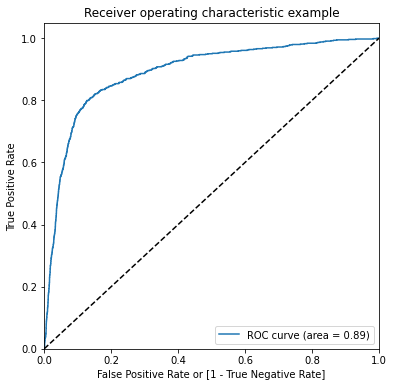

(array([0.00000000e+00, 1.21241513e-04, 1.21241513e-04, ...,
        9.99757517e-01, 9.99878758e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00135501, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99999999e+00, 9.99999990e-01, 9.99971314e-01, ...,
        8.32429981e-11, 5.36119614e-14, 3.19258678e-14]))

In [211]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.586684,1,1,1,1,1,1,0,0,0,0
1,0,0.000678,1,0,0,0,0,0,0,0,0,0
2,0,0.540201,1,1,1,1,1,1,0,0,0,0
3,0,0.323454,1,1,1,1,0,0,0,0,0,0
4,0,0.071175,1,0,0,0,0,0,0,0,0,0


In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082128  0.000000  1.000000
0.1   0.1  0.379590  0.326867  0.968835
0.2   0.2  0.532718  0.495272  0.951220
0.3   0.3  0.660361  0.637488  0.915989
0.4   0.4  0.757400  0.747333  0.869919
0.5   0.5  0.831071  0.830989  0.831978
0.6   0.6  0.881260  0.891246  0.769648
0.7   0.7  0.907634  0.932105  0.634146
0.8   0.8  0.920766  0.963385  0.444444
0.9   0.9  0.920654  0.985694  0.193767


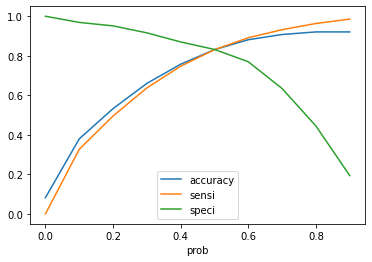

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [215]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5015390773658536]


In [216]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.50 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    8248
1     738
Name: churn, dtype: int64

In [217]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6854, 1394],
       [ 124,  614]])

In [218]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8310705541954151
Sensitivity:  0.8319783197831978
Specificity:  0.8309893307468477
false postive rate:  0.16901066925315228
positive predictive value:  0.3057768924302789
Negative predictive value:  0.9822298652909143


In [219]:
print('Important Features')
features_df = pd.DataFrame(col, columns = ["Features"]) 
features_df

Important Features


,Features
0,loc_ic_t2m_mou_8
1,loc_ic_t2f_mou_8
2,std_ic_t2t_mou_8
3,std_ic_t2f_mou_8
4,total_rech_num_8
5,sachet_2g_8
6,avg_loc_og_t2c_mou_av67
7,avg_std_ic_t2t_mou_av67
8,avg_total_rech_num_av67
9,avg_monthly_2g_av67


## Recommendations

> Business Insights

> Less number of **high value customer** are churning but for last **6 month** no new high valued customer is onboarded which is concerning and company should concentrate on that aspect.

> Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schemes to that group.

> Average revenue per user seems to be most important feature in determining churn prediction.

> Incoming and Outgoing Calls on roaming for 8th month are strong indicators of churn behaviour

> Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

> Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

> Logistic Regression produce good Recall(Sensitivity) with 0.80 (default overfit model) and 0.83 with tuned hyperparameters and an accuracy of 0.75 with default model and 0.83 with tuned hyperparameters

> XGBoost with tuned hyperparameters produce best result on this dataset with 0.77 Recall(Sensitivity) Score and an accuracy with 0.85.

> Decision Tree also produce Recall(Sensitivity) of 0.72 (default overfit model) and 0.71 with tuned hyperparameters with an accuracy of 0.78 for default model.

> **As per our analysis Logistic Regression (Without PCA) and XGBoost and DecisionTree (With PCA) produce best recall and  accuracy and these models can be selected to predict churn data for future dataset or production.**